In [2]:
import numpy as np
import pandas as pd
from astropy.io import fits
import astropy.constants as const
#import scipy.constants as const
import astropy.units as u
import argparse
import sys
import math
import cmath
import matplotlib.pyplot as plt

# Exercise 6.16: Lagrange Point

In [ ]:
def lagrange(r):
    G = const.G
    M = const.M_earth
    m = 7.348e22 * u.kg
    R = 3.844e8 * u.m
    omega = 2.662e-6 * (1/u.s)
    
    L = ((G * M) / np.square(r * u.m)) - ((G * m) / np.square(R - (r * u.m))) - (np.square(omega) * (r * u.m))
    
    return L.value

In [ ]:
def deriv_lagrange(r):
    G = const.G
    M = const.M_earth
    m = 7.348e22 * u.kg
    R = 3.844e8 * u.m
    omega = 2.662e-6 * (1/u.s)
    
    L_prime = ((-2 * G * M)/((r * u.m) ** 3)) - ((2 * G * m) / ((R - (r * u.m)) ** 3)) - np.square(omega)
    
    return L_prime.value

In [ ]:
r_range = np.linspace(1e8, 2e9, 1000)
L_vals = []
L_prime_vals = []

for r in r_range:
    L_vals.append(lagrange(r))
    L_prime_vals.append(deriv_lagrange(r))

In [ ]:
#L1 guess = 3.3e8 m
L1_guess = 3.3e8

def newtons_method(x_1, f = lagrange, f_prime = deriv_lagrange, tol = 1e-10, max_iter = 100000):
    num_iter = 0
    
    x_2 = x_1 - (f(x_1) / f_prime(x_1)) #x_2 isn't dependent on the second guess. It's dependent on P(x_1) and its derivative.
    
    while abs(x_2 - x_1) > tol: #Make sure the derivative isn't 0, or the function will fail
        num_iter += 1
        x_1 = x_2 #x_1 keeps changing until a root is found
        x_2 = x_1 - (f(x_1) / f_prime(x_1))
        
        if num_iter > max_iter: #Will be an infinite loop if we don't define the max iterations
            print(f"Did not converge after {max_iter} iterations.")
            return None #Won't return any values
    return x_2

In [ ]:
newtons_method(L1_guess)

In [ ]:
def secant_method(x_1, x_2, f = lagrange, tol = 1e-10, max_iter = 100000):
    #For the secant method, we're using pairs of points to find the roots
    
    num_iter = 0
    
    x_3 = x_2  - (f(x_2) * x_2  - ((x_2 - x_1) / (f(x_2) - f(x_1))))
    
    while abs(x_2 - x_3) > tol:
        num_iter += 1
        
        x_1 = x_2
        x_2 = x_3
        
        x_3 = x_2  - (f(x_2) * ((x_2 - x_1) / (f(x_2) - f(x_1))))
        
        if num_iter > max_iter: #Will be an infinite loop if we don't define the max iterations
            print(f"Did not converge after {max_iter} iterations.")
            return None #Won't return any values
    return x_3
        

In [ ]:
guess_1 = 3.1e8
guess_2 = 3.3e8

secant_method(guess_1, guess_2)

In [ ]:
fig = plt.figure(figsize = (12, 8))

plt.xlim(2.0e8, 5.0e8)
plt.ylim(-0.05, 0.05)

plt.title(r'$L_1$ Equation', fontsize = 20)
plt.xlabel('r (m)', fontsize = 15)
plt.ylabel('Distance (m)', fontsize = 15)

plt.plot(r_range, L_vals, color = 'blue', linewidth = 3, zorder = 1, label = 'Lagrange Equation')

plt.axhline(y = 0, color = 'black', linestyle = '--', linewidth = 2, zorder = 1, label = 'Axis Line')

plt.scatter(secant_method(guess_1, guess_2), 0, color = 'orangered', zorder = 2, s = 70, label = 'Secant Method')
plt.scatter(newtons_method(L1_guess), 0, color = 'mediumspringgreen', zorder = 2, s = 70, label = 'Newtons Method')

plt.legend(loc = 'upper right', fontsize = 15)
plt.grid()
plt.show()

# HW 4 - Fourier Analysis of TESS Light Curves

In [96]:
hdul = fits.open('/Users/giovannigollotti/Downloads/tic0000120016.fits')
times = hdul[1].data['times']
fluxes = hdul[1].data['fluxes']
ferrs = hdul[1].data['ferrs']

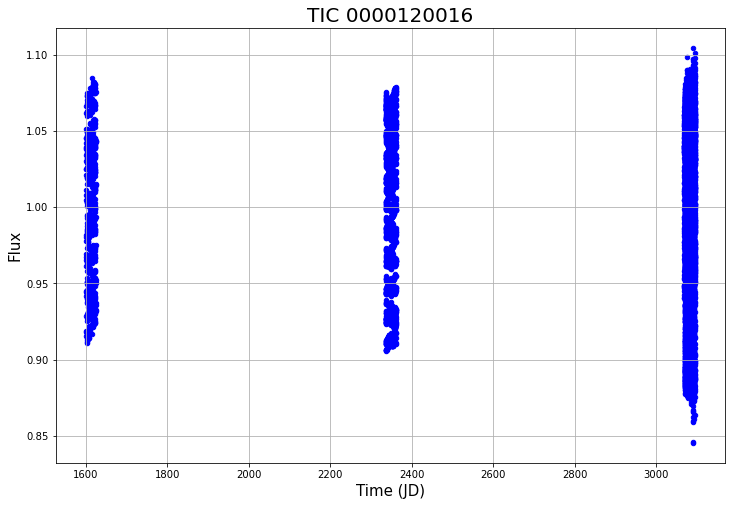

In [97]:
fig = plt.figure(figsize = (12,8))

plt.title('TIC 0000120016', fontsize = 20)
plt.xlabel('Time (JD)', fontsize = 15)
plt.ylabel('Flux', fontsize = 15)

#plt.xlim(1600, 1625)

plt.scatter(times, fluxes, s = 20, color = 'blue')
plt.grid()
plt.show()

In [98]:
light_index = (times > 1600) & (times < 1610)

In [99]:
new_times = times[light_index]
new_fluxes = fluxes[0:len(new_times)]
new_ferr = ferrs[0:len(new_times)]

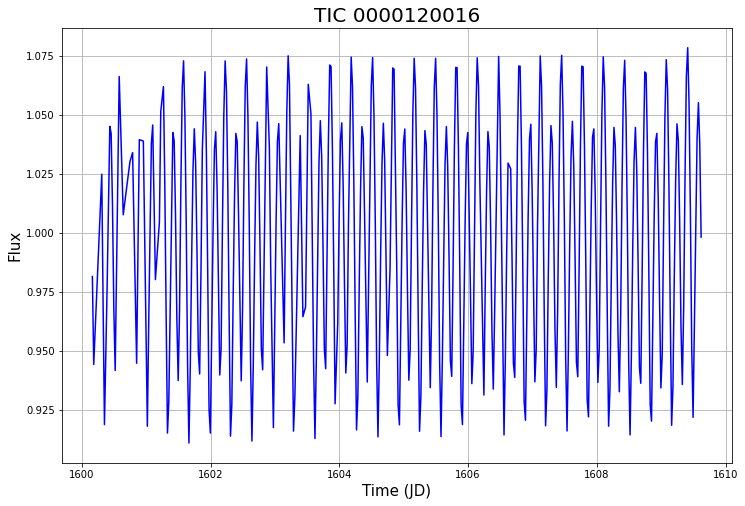

In [100]:
fig = plt.figure(figsize = (12,8))

plt.title('TIC 0000120016', fontsize = 20)
plt.xlabel('Time (JD)', fontsize = 15)
plt.ylabel('Flux', fontsize = 15)

#plt.xlim(1600, 1625)

#plt.scatter(new_times, new_fluxes, s = 20, color = 'blue')
plt.plot(new_times, new_fluxes, color = 'blue')
plt.grid()
plt.show()

Using Fourier analysis (use the numpy packages)

In [ ]:
coeffs = (np.fft.rfft(new_flux) ** 2)
k_range = np.arange(len(coeffs))

In [ ]:
fig = plt.figure(figsize = (12,8))

plt.title('DFT of TIC 0000120016', fontsize = 20)
plt.xlabel('k', fontsize = 15)
plt.ylabel('$c_k^2$', fontsize = 15)

#plt.xlim(1600, 1625)

plt.scatter(k_range[1:-1], coeffs[1:-1], s = 30, color = 'blue')
plt.grid()
plt.show()

In [ ]:
max_ck = np.max(coeffs[1:-1])
print(f"Max c_k = {max_ck:.3f}\n")

ck_arg_max = np.argmax(coeffs[1:-1])
max_k = k_range[ck_arg_max]
print(f"Max k = {max_k}\n")

In [ ]:
max_ck

In [ ]:
coeffs = coeffs[1:-1]

chosen_ck = np.where(coeffs > 0.1) #Same as the k_range

chosen_coeffs = coeffs[chosen_ck]

In [ ]:
fig = plt.figure(figsize = (12,8))

plt.title('DFT of TIC 0000120016', fontsize = 20)
plt.xlabel('k', fontsize = 15)
plt.ylabel('$c_k^2$', fontsize = 15)

#plt.xlim(1600, 1625)

plt.scatter(chosen_ck, chosen_coeffs, s = 30, color = 'blue')
plt.grid()
plt.show()

In [ ]:
np.fft.ifft(chosen_coeffs)

In [ ]:
new_times = new_times[1:-1]

new_times[chosen_ck]

In [ ]:
len(np.fft.ifft(chosen_coeffs))

In [ ]:
len(new_times[chosen_ck])

In [ ]:
fig = plt.figure(figsize = (12,8))

plt.title('TIC 0000120016', fontsize = 20)
plt.xlabel('Time (JD)', fontsize = 15)
plt.ylabel('Flux', fontsize = 15)

plt.scatter(new_times[chosen_ck], np.fft.ifft(chosen_coeffs), color = 'blue')
plt.grid()
plt.show()

Try writing the Fourier Transforms by hand and see if that helps

In [121]:
def DFT(fluxes): #finds ck values
    
    N = len(fluxes) #N is dependent on the length of the flux array
    N_real = N//2 + 1 #If we don't isolate for real values, our ck values will be duplicated
    c = np.zeros(N_real, dtype = 'complex')
    
    for k in range(N_real):
        for n in range(N):
            c[k] += fluxes[n] * cmath.exp(-2j * cmath.pi * k * n/N)
            
    return c

In [102]:
def inverse_DFT(time, c_k): #This method is probably wrong
    
    N = len(time) #N is dependent on the length of the time array
    f = np.zeros(N, dtype = 'complex') #All time values are real, so we don't need to isolate for real values
    
    for k in range(N): #Shrinks the time array by ~half
        for n in range(N): #Dependent on the length of the time array
            f[k] += (1/N) * c_k[n] * cmath.exp((-2j * np.pi * k * n) / N)
    
    return f #Returns new flux values

In [122]:
coeffs = DFT(new_fluxes)

In [123]:
coeffs_squared = coeffs * np.conjugate(coeffs) #These will be plotted, so every c_k value is a real number

In [124]:
len(coeffs_squared)

192

In [125]:
k_range = np.arange(1, len(coeffs_squared) - 1, 1)

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/collections.py:202: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


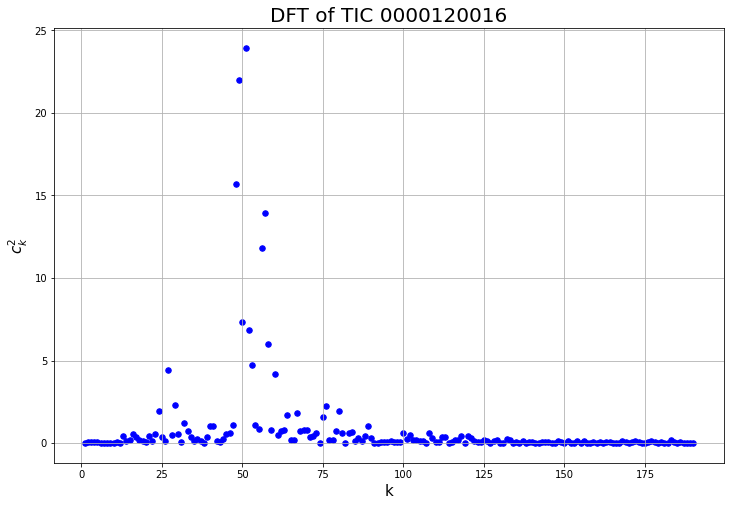

In [126]:
fig = plt.figure(figsize = (12,8))

plt.title('DFT of TIC 0000120016', fontsize = 20)
plt.xlabel('k', fontsize = 15)
plt.ylabel('$c_k^2$', fontsize = 15)

#plt.xlim(1600, 1625)

plt.scatter(k_range, coeffs_squared[1:-1], s = 30, color = 'blue')
plt.grid()
plt.show()

In [127]:
#Finding c_k and k val
ck_max = np.max(coeffs_squared[1:-1]) #max ck^2 value

ck_arg_max = np.argmax(coeffs_squared[1:-1]) #Finds the index corresponding to the max ck^2 value
max_k = k_range[ck_arg_max]

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


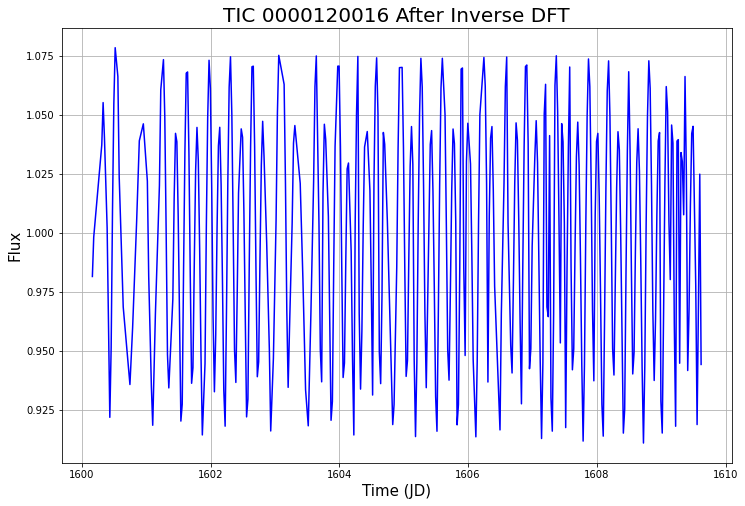

In [110]:
fig = plt.figure(figsize = (12,8))

plt.title('TIC 0000120016 After Inverse DFT', fontsize = 20)
plt.xlabel('Time (JD)', fontsize = 15) #How am I supposed to change the time?
plt.ylabel('Flux', fontsize = 15)

#plt.scatter(new_times, flux_vals, s = 20, color = 'blue') #This plot looks exactly the same as the first plot
plt.plot(new_times, flux_vals, color = 'blue')
plt.grid()
plt.show()

In [ ]:
#I don't like these plots at all. I need to try Ari's method but with my DFT and inverse DFT methods, because
#I'm pretty sure I'm supposed to see dips in the light curve. I don't see any dips, so I know this is wrong.
#

In [129]:
#Let's try isolating data that's within a specific range
keep = coeffs_squared > 0.1 * ck_max
keep.sum()

12

In [130]:
coeffs_new = np.copy(coeffs)
coeffs_new[~keep] = 0.0 #Anything that isn't within the given range is assigned a 0.0 value, so the array length doesn't change

In [131]:
y = np.fft.irfft(coeffs_new)

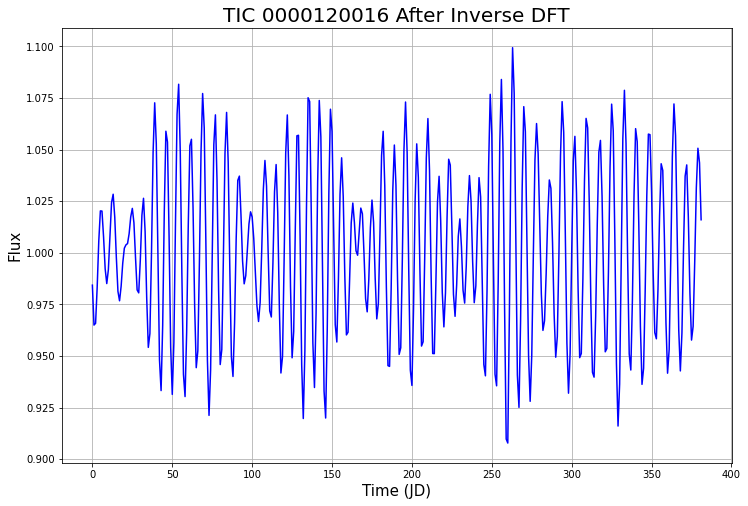

In [132]:
fig = plt.figure(figsize = (12,8))

plt.title('TIC 0000120016 After Inverse DFT', fontsize = 20)

plt.xlabel('Time (JD)', fontsize = 15)
plt.ylabel('Flux', fontsize = 15)

plt.plot(y, color = 'blue')

plt.grid()
plt.show()

In [ ]:
#Check my code with Sarah tomorrow
#Goal of the homework is for the inverse DFT to look similar to the original plot